## <center>Elements Of Data Science - F2022</center>
# <center>Week 12: Time Series, Model API with Flask<center>
### <center>11/30/2020</center>

# TODOs

- Readings:
  - Recommended: DSFS: [Chap 9: Getting Data](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d979529%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_103)
  - Recommended: DSFS: [Chap 23: Databases and SQL](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d979529%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_275)
<br>

- HW4, **Due Friday December 2nd 11:59pm ET**
- Quiz 12, **Due Tuesday December 6th 11:59pm ET**
- Final
  - Review sheet in github repo (soon!)
  - Online via Gradescope, open-book, open-note, open-python
  - Released *Wednesday December 7th 11:59pm ET*
  - **Due Friday December 9th 11:59pm ET**
  - Have maximum of 24hrs after starting to finish
  - 30-40 questions (fill in the blank/multiple choice/short answer)
  - Questions asked/answered **privately** via Ed


# Quiz Common Mistakes (points off)

- don't remove instructions from quiz/homework
- `.info()` not `.info`: make sure function/method calls are made with `()`
- Pandas `.sample()` default `n=1`: need to set `n=` or `frac=`
- LinearRegression (regression) vs LogisticRegression (classification)
- using a model "with default settings" means Model() or just a subset of parameters set
- Be careful which dataset you're training/evaluating on: X_train vs X_test
- Make sure all plotting settings get used (eg hue=)
<br>

- `y_digits[cluster_assignments_km == 9]`
- `sns.scatterplot(x=X_2D[:,0],y=X_2D[:,1],...`

# Today

- Time Series Transformations
- Model Prediction API with Flask

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

# Time Series
<br>

- Data ordered in time
<br>

- Applications
  - Financial
  - Economic
  - Scientific
  - etc.

# Time Series Differences
<br>

- **Non-i.i.d.** :  not independent and identically distributed
<br>

- not independent
  - Ex: Stock price
<br>
<br>

- not-identically distributed
  - Ex: Seasonality
<br>
<br>

- In other words: Order matters!

# Representing Time in Python

- `datetime` library
- Pandas `Timestamp`

# `datetime.date`

In [2]:
from datetime import date

friday = date(2022,11,1) # year,month,day
friday

datetime.date(2022, 11, 1)

In [3]:
today = date.today()
today

datetime.date(2022, 11, 30)

In [4]:
today.year

2022

# `datetime.time`

In [5]:
from datetime import time

class_start = time(19,10,0) # hour,minute,second,microsecond 
class_start

datetime.time(19, 10)

In [6]:
class_start.hour

19

# `datetime.datetime`


In [7]:
from datetime import datetime

# year,month,day,hour,minute,second,microsecond
wednesday_afternoon = datetime(2022,11,30,15)
wednesday_afternoon

datetime.datetime(2022, 11, 30, 15, 0)

In [8]:
now = datetime.now()
now

datetime.datetime(2022, 11, 30, 18, 4, 6, 48207)

# `datetime.timedelta`


In [9]:
diff = datetime(2022,11,30,1) - datetime(2022,11,29,0)
diff

datetime.timedelta(days=1, seconds=3600)

In [10]:
diff.total_seconds()

90000.0

In [11]:
from datetime import timedelta

#days,seconds,microseconds,milliseconds,minutes,hours,weeks
one_day = timedelta(1)

date(2022,11,30) + 2*one_day

datetime.date(2022, 12, 2)

# Printing Datetimes: `strftime()`

In [12]:
now = datetime.now()
print(now)

2022-11-30 18:04:06.077953


In [13]:
now.strftime('%a %h %d, %Y %I:%M %p')

'Wed Nov 30, 2022 06:04 PM'

See [strftime.org](http://strftime.org) and [strfti.me](https://www.strfti.me/)

# Parsing Datetimes: `pandas.to_datetime()`

- `dateutil.parser` available
- pandas has parser built in: `pd.to_datetime()`

In [14]:
pd.to_datetime('11/30/2022 7:36pm')

Timestamp('2022-11-30 19:36:00')

In [15]:
dt_index = pd.to_datetime([datetime(2020, 11, 26),
                           '27th of November, 2020',
                           '2020-Nov-28',
                           '11-29-2030',
                           '20201130',
                           None
                          ])
dt_index

DatetimeIndex(['2020-11-26', '2020-11-27', '2020-11-28', '2030-11-29',
               '2020-11-30', 'NaT'],
              dtype='datetime64[ns]', freq=None)

# `pandas.Timestamp`

- like `datetime.datetime`
- can include **timezone** and **frequency** info
- can handle a missing time: `NaT`
- can be used anywhere `datetime` can be used
- an array of Timestamps can be used as an index

In [16]:
pd.Timestamp(2022,11,30,19)

Timestamp('2022-11-30 19:00:00')

In [17]:
pd.Timestamp('20221130 7:00pm EST')

Timestamp('2022-11-30 19:00:00-0500', tz='tzlocal()')

In [18]:
pd.Timestamp('20221130 7:00pm',tz='US/Pacific')

Timestamp('2022-11-30 19:00:00-0800', tz='US/Pacific')

In [19]:
dt_index[0]

Timestamp('2020-11-26 00:00:00')

# Accessing Datetime Components with `.dt`


In [20]:
df_taxi = pd.read_csv('../data/yellowcab_tripdata_2017-01_subset10000rows.csv',
                      parse_dates=['tpep_pickup_datetime']).head(3)
df_taxi.tpep_pickup_datetime

0   2017-01-10 18:37:59
1   2017-01-05 15:14:52
2   2017-01-11 14:47:52
Name: tpep_pickup_datetime, dtype: datetime64[ns]

In [21]:
df_taxi.tpep_pickup_datetime.dt.day

0    10
1     5
2    11
Name: tpep_pickup_datetime, dtype: int64

In [22]:
df_taxi.tpep_pickup_datetime.dt.day_of_week # Monday=0 ... Sunday=6

0    1
1    3
2    2
Name: tpep_pickup_datetime, dtype: int64

In [23]:
df_taxi.tpep_pickup_datetime.dt.hour

0    18
1    15
2    14
Name: tpep_pickup_datetime, dtype: int64

# DateIndex Indexing/Selecting/Slicing

In [24]:
s = pd.Series(['Dec 1 2021','Jan 2 2022','Feb 3 2022'],
              index=pd.to_datetime(['Dec 1 2021','Jan 2 2022','Feb 3 2022']))
s

2021-12-01    Dec 1 2021
2022-01-02    Jan 2 2022
2022-02-03    Feb 3 2022
dtype: object

In [25]:
# can index normally using iloc
s.iloc[0:2]

2021-12-01    Dec 1 2021
2022-01-02    Jan 2 2022
dtype: object

# DateIndex Indexing/Selecting/Slicing Cont.

In [26]:
# only rows from the year 2022
s.loc['2022']

2022-01-02    Jan 2 2022
2022-02-03    Feb 3 2022
dtype: object

In [27]:
# only rows from January 2022
s.loc['2022-01']

2022-01-02    Jan 2 2022
dtype: object

In [28]:
# only rows between Jan 1st 2021 and Jan 2nd 2022, inclusive
s.loc['01/01/2021':'01/02/2022']

2021-12-01    Dec 1 2021
2022-01-02    Jan 2 2022
dtype: object

# Datetimes in DataFrames


In [29]:
df = pd.DataFrame([['12/1/2021',101,'A'],
                   ['1/1/2022',102,'B']],columns=['col1','col2','col3'])
df.col1 = pd.to_datetime(df.col1)
df.set_index('col1',drop=True,inplace=True)
df

,col2,col3
col1,,
2021-12-01,101,A
2022-01-01,102,B


In [30]:
# only return rows from 2022
df.loc['2022']

,col2,col3
col1,,
2022-01-01,102,B


# Timestamp Index: Setting Frequency

In [31]:
s = pd.Series(['Nov 1 2022','Nov 3 2022'],index=pd.to_datetime(['Nov 1 2022','Nov 3 2022']))
s

2022-11-01    Nov 1 2022
2022-11-03    Nov 3 2022
dtype: object

In [32]:
# Use resample() and asfreq() to set frequency
s.resample('D').asfreq()

2022-11-01    Nov 1 2022
2022-11-02           NaN
2022-11-03    Nov 3 2022
Freq: D, dtype: object

In [33]:
pd.to_datetime(['Nov 1 2022','Nov 3 2022'])

DatetimeIndex(['2022-11-01', '2022-11-03'], dtype='datetime64[ns]', freq=None)

In [34]:
# Use date_range with freq to get a range of dates of a certain frequency
pd.date_range(start='Nov 1 2022',end='Nov 3 2022',freq='D')

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03'], dtype='datetime64[ns]', freq='D')

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

# Timezones

- Handled by `pytz` library

In [35]:
import pytz

[x for x in pytz.common_timezones if x.startswith('U')] 

['US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

UTC: coordinated universal time (EST is 5 hours behind, -5:00)

# Timezones Cont.

In [36]:
ts = pd.date_range('11/2/2022 9:30am',periods=2,freq='D')
ts

DatetimeIndex(['2022-11-02 09:30:00', '2022-11-03 09:30:00'], dtype='datetime64[ns]', freq='D')

In [37]:
# Set timezone using .localize()
ts_utc = ts.tz_localize('US/Eastern')
ts_utc

DatetimeIndex(['2022-11-02 09:30:00-04:00', '2022-11-03 09:30:00-04:00'], dtype='datetime64[ns, US/Eastern]', freq=None)

In [38]:
# Change timezones using .tz_convert()
ts_utc.tz_convert('UTC')

DatetimeIndex(['2022-11-02 13:30:00+00:00', '2022-11-03 13:30:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)

In [39]:
# Can also initilize with timezone set
ts = pd.date_range('11/2/2022 9:30am',periods=2,freq='D',tz='US/Eastern')
ts

DatetimeIndex(['2022-11-02 09:30:00-04:00', '2022-11-03 09:30:00-04:00'], dtype='datetime64[ns, US/Eastern]', freq='D')

# Time Series in Python so far:
<br>

- `datetime .date .time .datetime .timedelta`
- format with `.strftime()`
- parse time with `pd.to_datetime()`
- `pandas Timestamp Timedelta DatetimeIndex`
- Indexing with `DatetimeIndex`
- Frequencies
- Timezones
<br>

Next: Operations on Time Series data 
- Shifting
- Resampling
- Moving Windows

# Shifting/Lagging

- Moving data backward or forward in time (lagging/leading)
- Ex: calculate percent change

In [40]:
ts = pd.Series([1,2,8],
               index=pd.date_range('1/1/2022',periods=3,freq='M')) # Month End frequency (MS: Month Start)
ts

2022-01-31    1
2022-02-28    2
2022-03-31    8
Freq: M, dtype: int64

In [41]:
ts.shift(1) # last month's value

2022-01-31    NaN
2022-02-28    1.0
2022-03-31    2.0
Freq: M, dtype: float64

# Shifting

- **percent change**, use one of : 
  - (new_value - old_value) / old_value
  - (new_value / old_value) - 1

In [42]:
#  multiply by 100 to turn into a percent
((ts / ts.shift(1)) - 1) * 100

2022-01-31      NaN
2022-02-28    100.0
2022-03-31    300.0
Freq: M, dtype: float64

# Example Dataset: Twitter Stock

In [43]:
# from pandas_datareader import data
# df_twtr = data.DataReader('TWTR', start='2015', end='11/27/2022', data_source='yahoo') 
# df_twtr.to_csv('../data/twtr_20150102-20221127.csv')
df_twtr = pd.read_csv('../data/twtr_20150102-20221127.csv',parse_dates=['Date'],index_col='Date')
df_twtr.head(3).round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,36.74,35.54,36.23,36.56,12062461.0,36.56
2015-01-05,37.11,35.64,36.26,36.38,15062744.0,36.38
2015-01-06,39.45,36.04,36.27,38.76,33050812.0,38.76


In [44]:
df_twtr.info() # Adj Close factors in corporate actions, such as stock splits, dividends, and rights offerings

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1970 entries, 2015-01-02 to 2022-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1970 non-null   float64
 1   Low        1970 non-null   float64
 2   Open       1970 non-null   float64
 3   Close      1970 non-null   float64
 4   Volume     1970 non-null   float64
 5   Adj Close  1970 non-null   float64
dtypes: float64(6)
memory usage: 107.7 KB


# Example Dataset: Twitter Stock

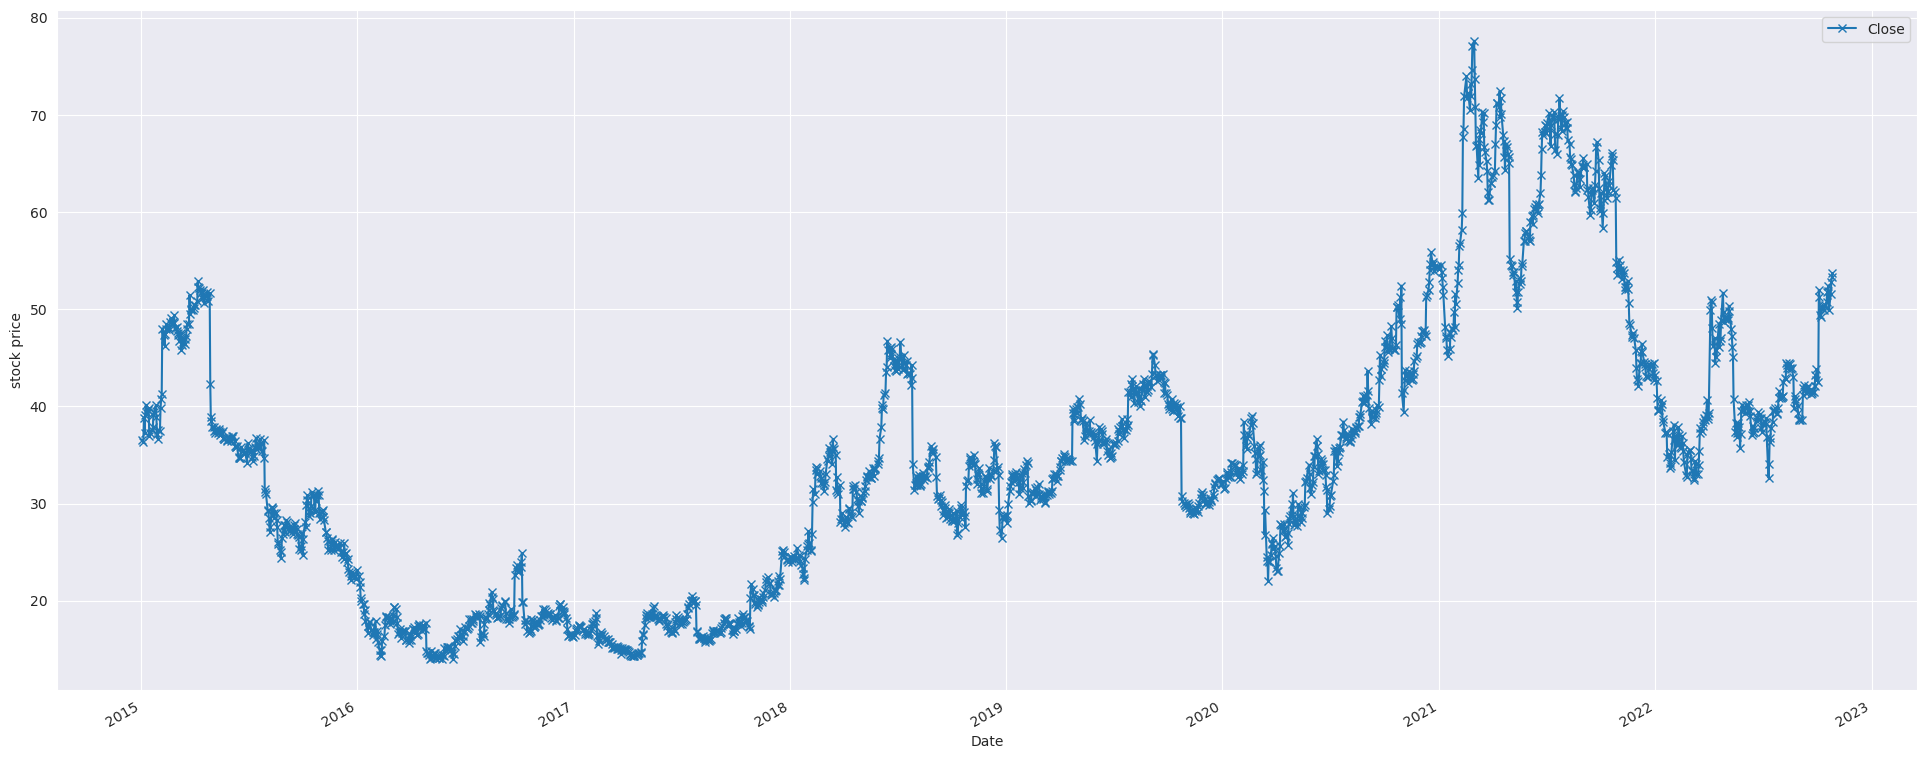

In [45]:
fig,ax = plt.subplots(1,1,figsize=(24,10))
df_twtr[['Close']].plot(ax=ax,marker='x');
ax.set_ylabel('stock price');

# Shifting Example: Percent Change Twitter Close

In [46]:
((df_twtr.Close / df_twtr.Close.shift(1)) - 1).tail(3).round(3) # # (today / yesterday) - 1

Date
2022-10-25    0.024
2022-10-26    0.011
2022-10-27    0.007
Name: Close, dtype: float64

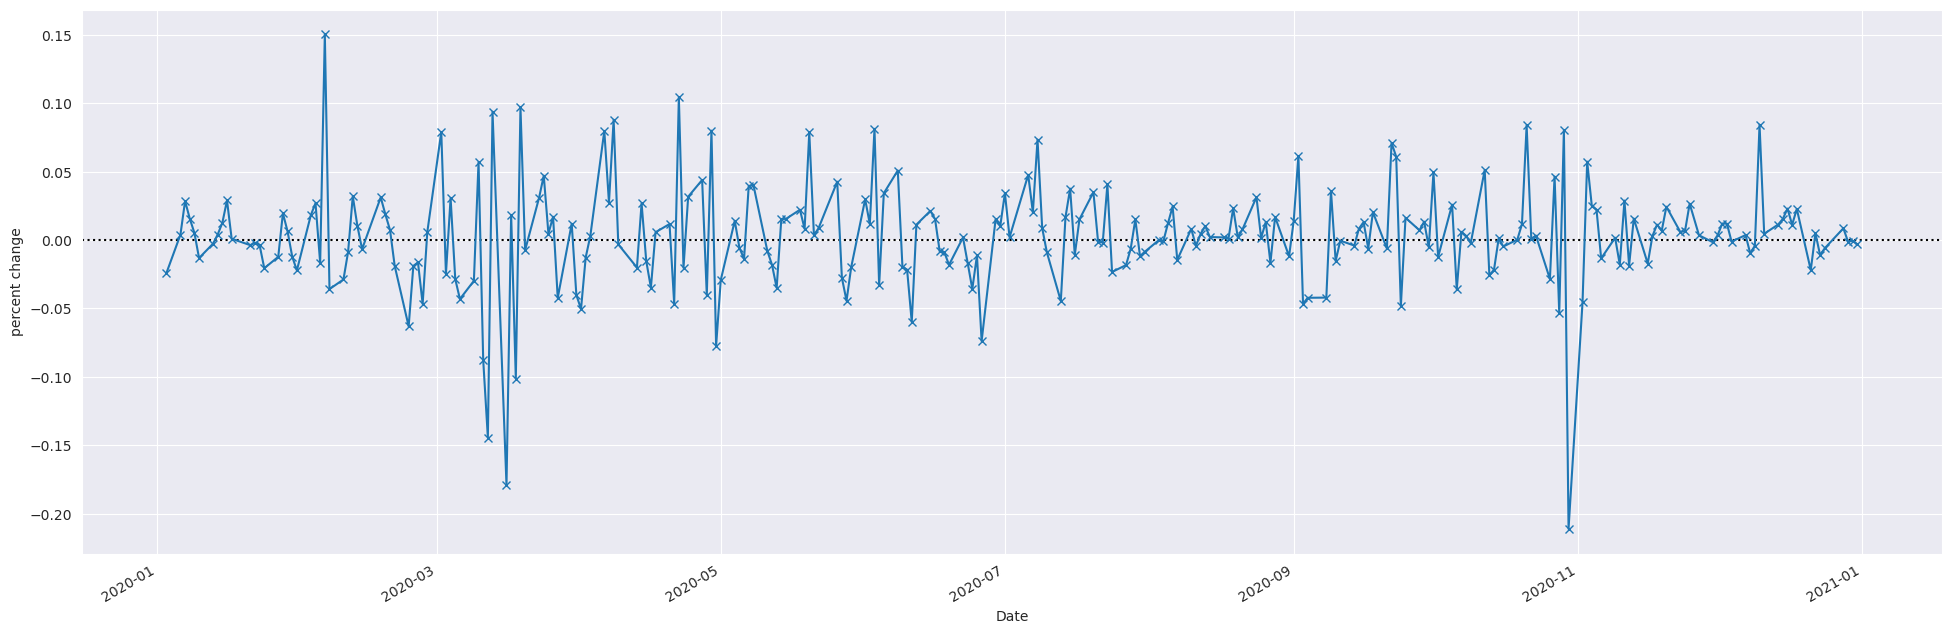

In [47]:
# plot percent change of close in 2022
fig,ax = plt.subplots(1,1,figsize=(24,8))
close_2020 = df_twtr.loc['2020','Close']
((close_2020 / close_2020.shift(1)) - 1 ).plot(marker='x',ax=ax,zorder=2);
ax.axhline(ls=':',c='k',zorder=1)
ax.set_ylabel('percent change');

# Resampling

- Convert from one frequency to another
<br>

- **Downsampling**
  - from higher to lower (day to month)
  - need to aggregate
<br>
<br>

- **Upsampling**
  - from lower to higher (month to day)
  - need to fill missing
<br>
<br>

- **Can also be used to set frequency from None**

# Resampling: Initialize Frequency

In [48]:
df_twtr.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', name='Date', length=1970, freq=None)

In [49]:
df_twtr_B = df_twtr.resample('B').asfreq() # set frequency to business day
df_twtr_B.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', name='Date', length=2040, freq='B')

# Resampling: Downsampling

- Go from higher/shorter to lower/longer
- Need to aggregate (like groupby)
- Example: Downsampling from business day to business quarter
    

In [50]:
df_twtr_BQ = df_twtr_B.resample('BQ')
df_twtr_BQ

In [51]:
print(df_twtr_BQ)

DatetimeIndexResampler [freq=<BusinessQuarterEnd: startingMonth=12>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [52]:
df_twtr_BQ.mean().head(3).round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-31,45.10,43.55,44.23,44.34,20840997.51,44.34
2015-06-30,41.63,40.38,41.17,40.87,22287099.56,40.87
2015-09-30,30.64,29.42,30.05,30.00,20065038.11,30.00


# Resampling: Downsampling
    

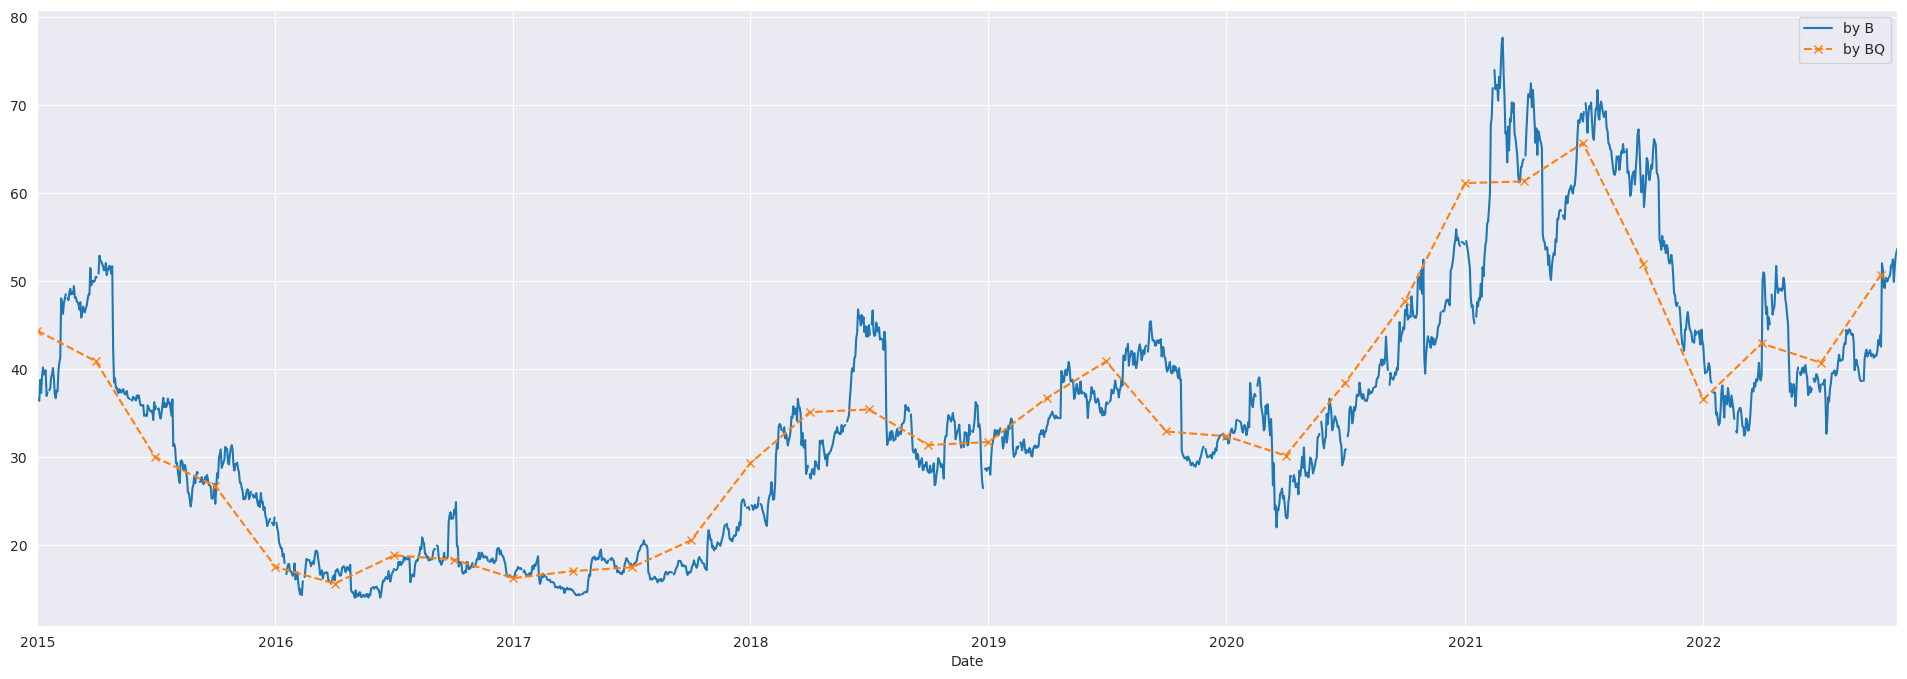

In [53]:
fig,ax = plt.subplots(1,1,figsize=(24,8))
df_twtr_B.Close.plot(style='-', label='by B',ax=ax)
df_twtr_BQ.Close.mean().plot(style='--',marker='x',label='by BQ',ax=ax)
plt.legend(loc='upper right');

# Resampling: Upsampling

- Go from lower/longer to higher/shorter
- Need to decide how to handle missing values
- Example: Upsample from business day to hour

In [54]:
df_twtr_B.index[:3]

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06'], dtype='datetime64[ns]', name='Date', freq='B')

In [55]:
df_twtr_B.Close.resample('H').asfreq().iloc[0:3].round(2)

Date
2015-01-02 00:00:00    36.56
2015-01-02 01:00:00      NaN
2015-01-02 02:00:00      NaN
Freq: H, Name: Close, dtype: float64

In [56]:
df_twtr_B.Close.resample('H').asfreq().iloc[70:73].round(2)

Date
2015-01-04 22:00:00      NaN
2015-01-04 23:00:00      NaN
2015-01-05 00:00:00    36.38
Freq: H, Name: Close, dtype: float64

# Resampling: Upsampling

- `ffill()` : Forward Fill

In [57]:
df_twtr_B.Close.resample('H').ffill().head(3).round(2)

Date
2015-01-02 00:00:00    36.56
2015-01-02 01:00:00    36.56
2015-01-02 02:00:00    36.56
Freq: H, Name: Close, dtype: float64

- `bfill()`: Backward Fill
    

In [58]:
df_twtr_B.Close.resample('H').bfill().head(3).round(3)

Date
2015-01-02 00:00:00    36.56
2015-01-02 01:00:00    36.38
2015-01-02 02:00:00    36.38
Freq: H, Name: Close, dtype: float64

# Moving/Rolling Windows

- Apply function on a fixed window moving across time
- Method of smoothing out the data
- **center** : place values at center of window
   

In [59]:
df_twtr_B.Close['2020-11-02':'2020-11-06'].round(2)

Date
2020-11-02    39.47
2020-11-03    41.73
2020-11-04    42.76
2020-11-05    43.71
2020-11-06    43.12
Freq: B, Name: Close, dtype: float64

In [60]:
rolling_3 = df_twtr_B.Close['2020-11-02':'2020-11-06'].rolling(3, center=True)
rolling_3

Rolling [window=3,center=True,axis=0,method=single]

In [61]:
rolling_3.mean()['2020-11-02':'2020-11-06'].round(2)

Date
2020-11-02      NaN
2020-11-03    41.32
2020-11-04    42.73
2020-11-05    43.20
2020-11-06      NaN
Freq: B, Name: Close, dtype: float64

# Moving Windows

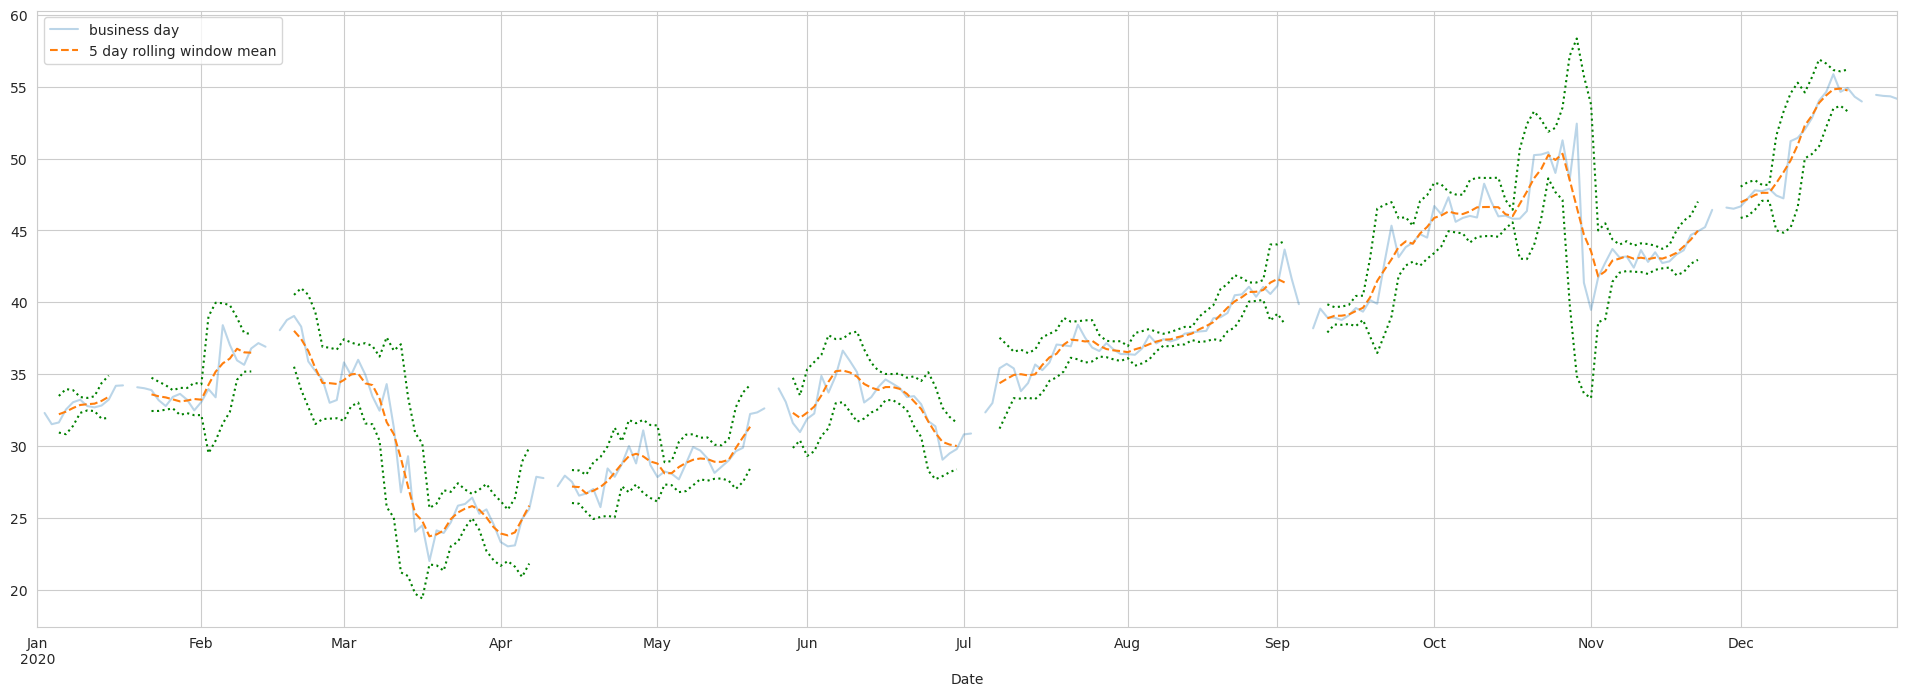

In [62]:
sns.set_style("whitegrid")
rolling = df_twtr_B.Close.rolling(5, center=True)

fig,ax = plt.subplots(1,1,figsize=(24,8));
df_twtr_B.loc['2020'].Close.plot(style='-',alpha=0.3,label='business day');
rolling.mean().loc['2020'].plot(style='--',label='5 day rolling window mean');
(rolling.mean().loc['2020'] + 2*rolling.std().loc['2020']).plot(style=':',c='g',label='_nolegend_');
(rolling.mean().loc['2020'] - 2*rolling.std().loc['2020']).plot(style=':',c='g',label='_nolegend_');
ax.legend();

# Example: Bike Travel (From PDSH Chapter 3.11)
- Bicycle traffic over Fremont Bridge in Seattle in 2012
- <font size=5> Data gathered using:`!curl -o ../data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD`

In [63]:
df_bike_counts = pd.read_csv('../data/FremontBridge_2012-2015.csv',parse_dates=['Date'],index_col='Date')
df_bike_counts.columns = ['Total','East','West']
df_bike_counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28440 entries, 2012-10-03 00:00:00 to 2015-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   28433 non-null  float64
 1   East    28433 non-null  float64
 2   West    28433 non-null  float64
dtypes: float64(3)
memory usage: 888.8 KB


In [64]:
df_bike_counts.head(3)

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0


# Example: Fill Missing Values

In [65]:
f'proportion missing: {sum(df_bike_counts.Total.isna()) / len(df_bike_counts):0.5f}'

'proportion missing: 0.00025'

In [66]:
df_bike_counts = df_bike_counts.fillna(method='ffill')
df_bike_counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28440 entries, 2012-10-03 00:00:00 to 2015-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   28440 non-null  float64
 1   East    28440 non-null  float64
 2   West    28440 non-null  float64
dtypes: float64(3)
memory usage: 888.8 KB


# Plot data from 2015

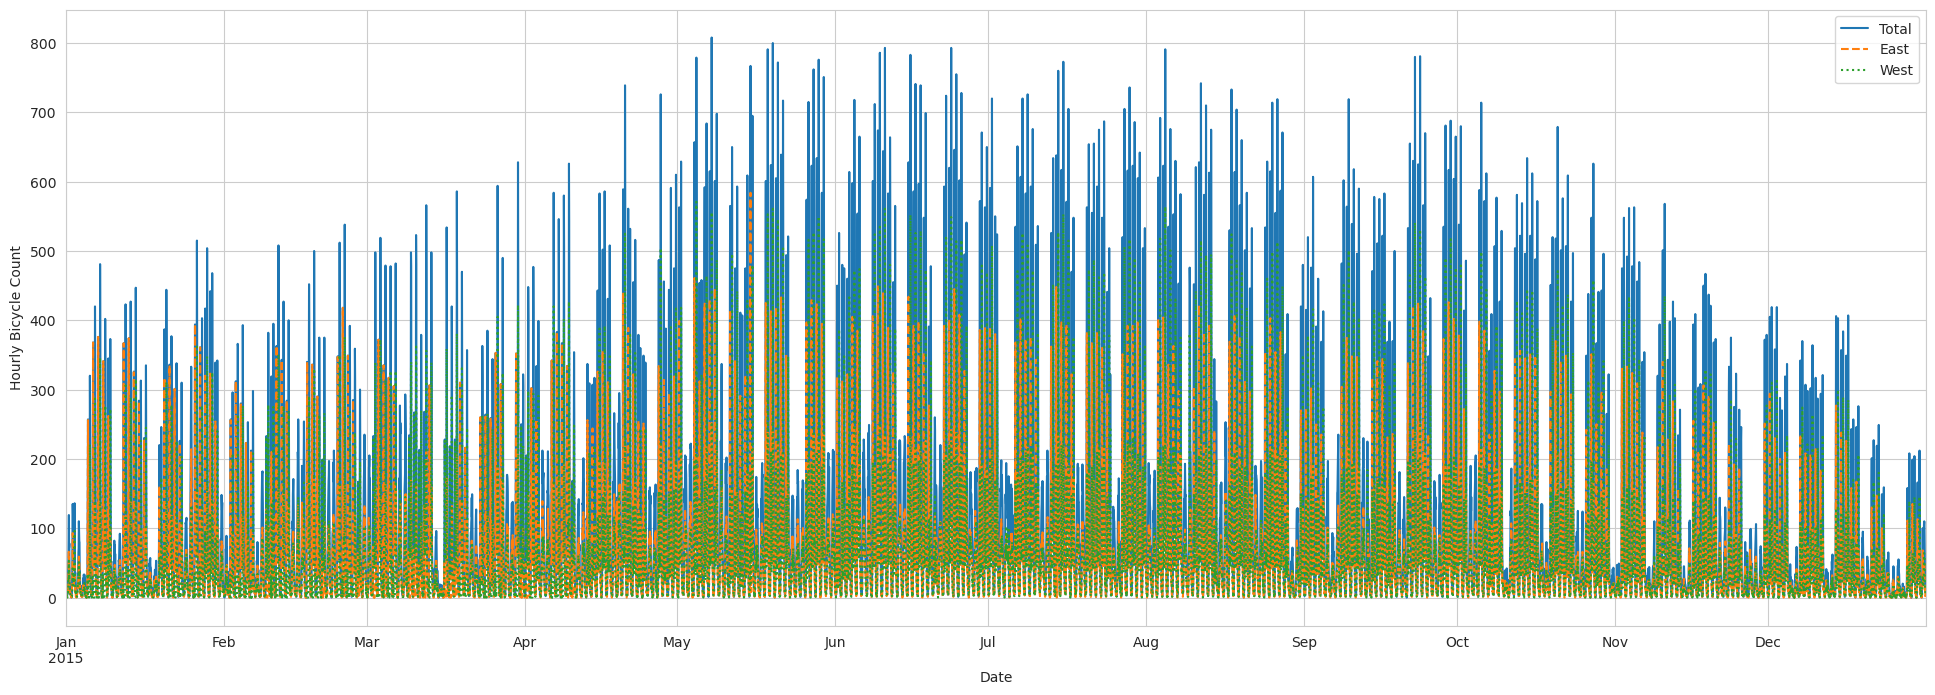

In [67]:
fig,ax = plt.subplots(1,1,figsize=(24,8))
df_bike_counts.loc['2015'].plot(style=['-', '--', ':'],ax=ax)
plt.ylabel('Hourly Bicycle Count');

### Downsample to weekly sum to smooth things out

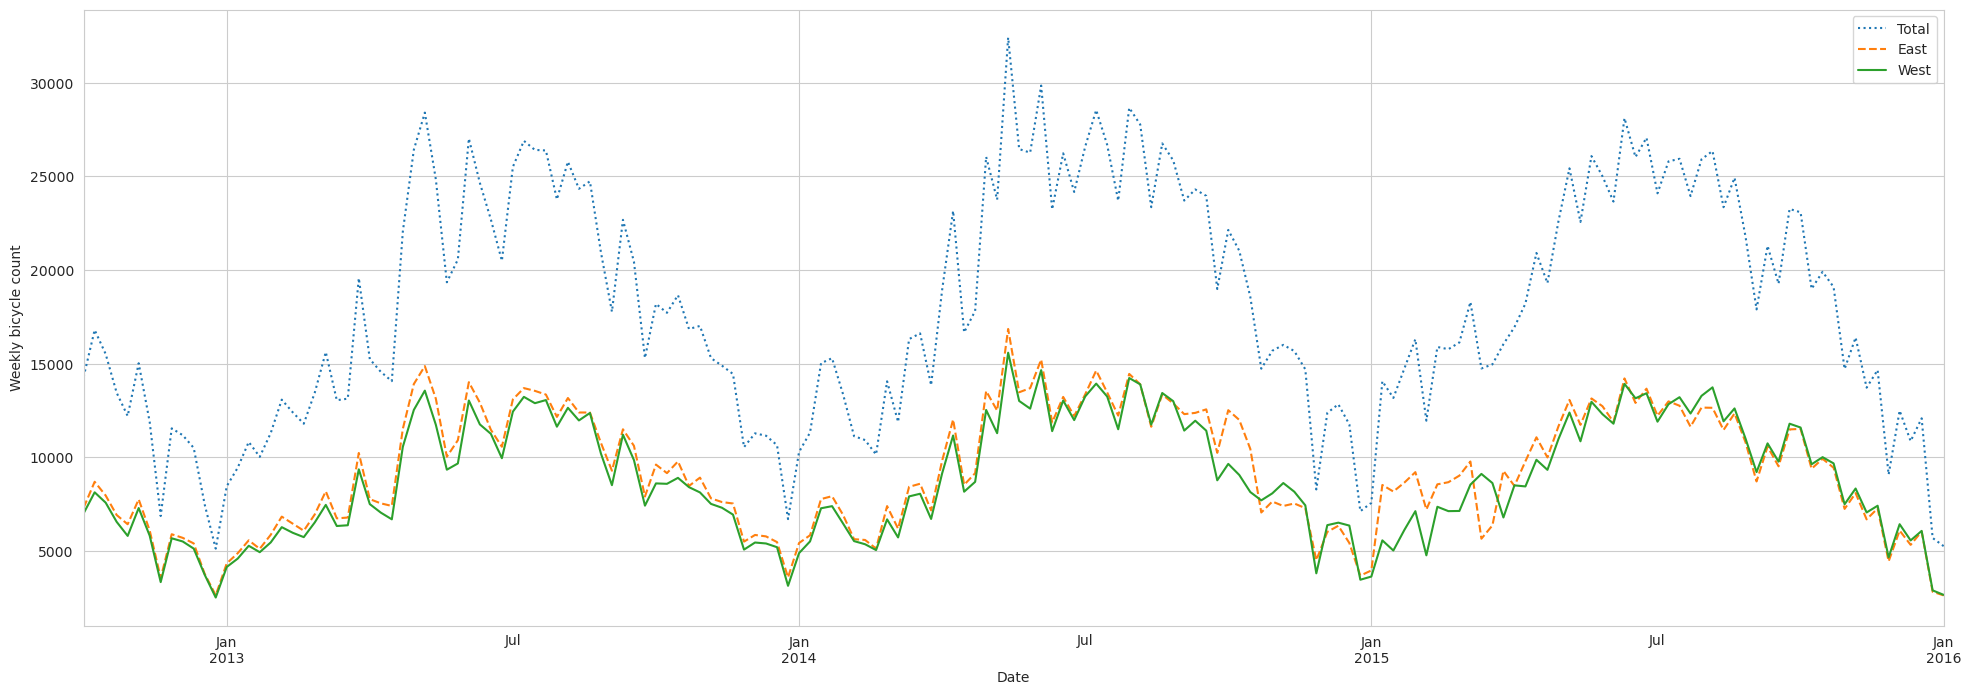

In [68]:
weekly = df_bike_counts.resample('W').sum()
weekly.plot(style=[':', '--', '-'], figsize=(24,8))
plt.ylabel('Weekly bicycle count');

### Resample at daily for a more granular view and apply a rolling window of 30 days

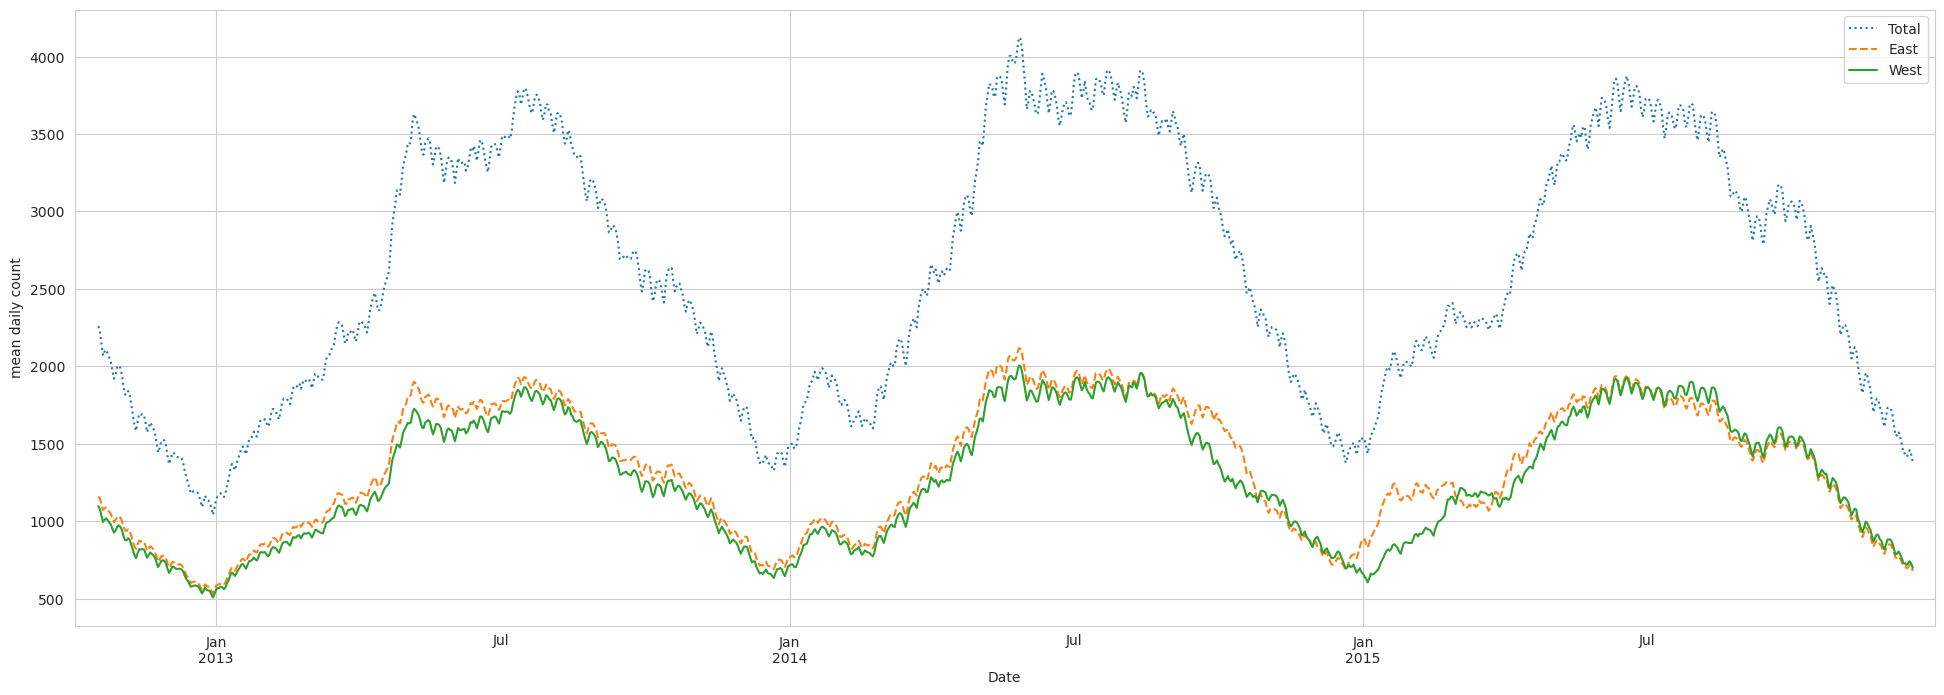

In [69]:
daily = df_bike_counts.resample('D').sum()
daily.rolling(30,center=True).mean().plot(style=[':', '--', '-'], figsize=(24,8))
plt.ylabel('mean daily count');

### A wider window using a gaussian filter smooths more while accentuating daily differences

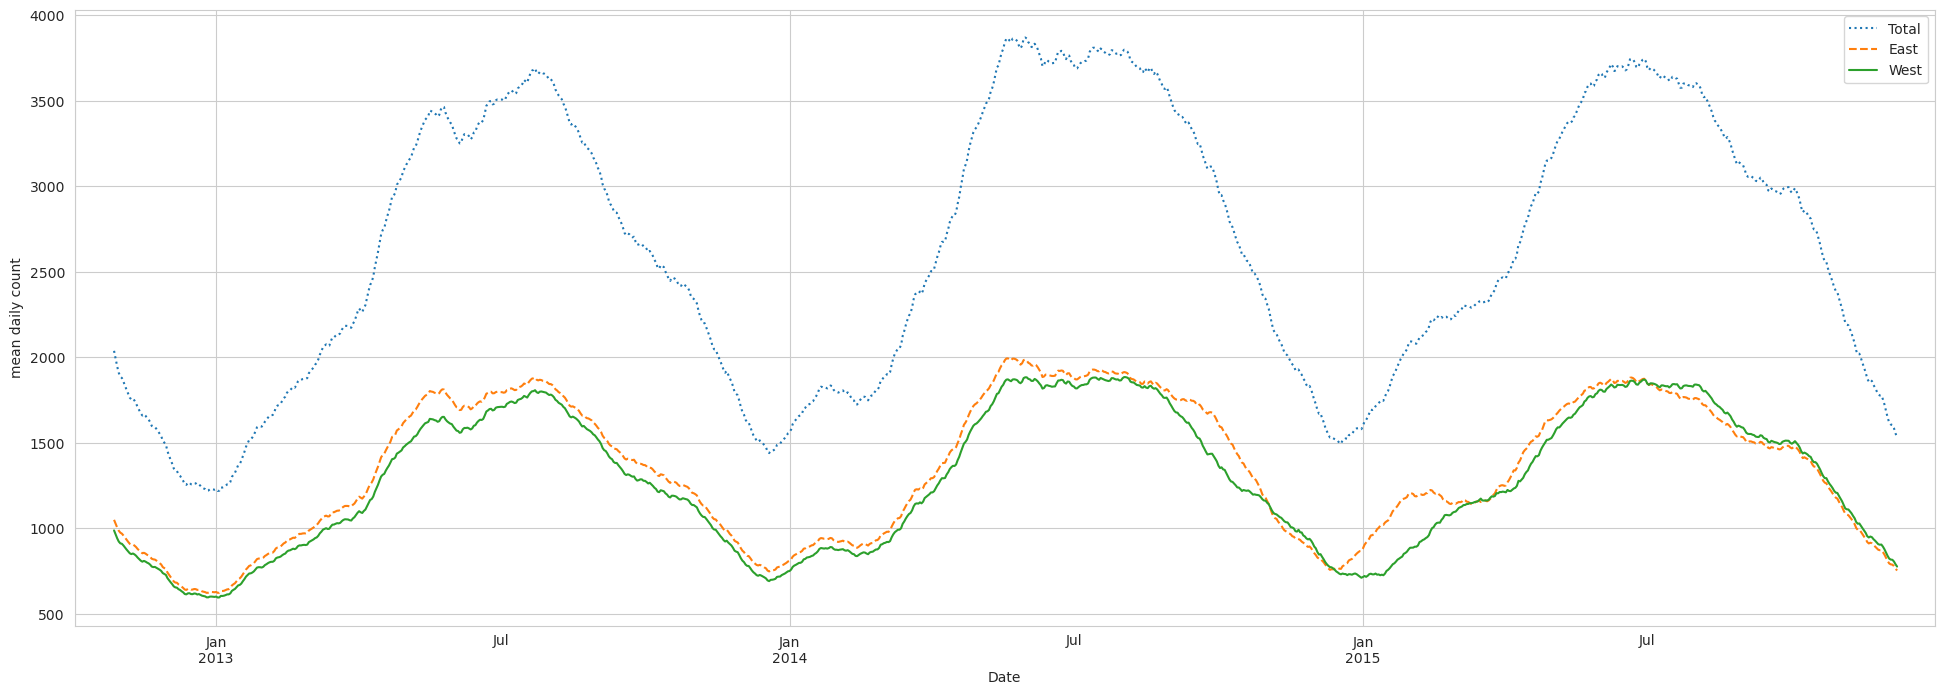

In [70]:
daily.rolling(50,center=True,win_type='gaussian').mean(std=20).plot(style=[':','--','-'],figsize=(24,8));
plt.ylabel('mean daily count');

### From Datetime to Time

In [71]:
#If we want to only look at time of day
df_bike_counts.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [72]:
#Get mean data by time (hourly)
by_time = df_bike_counts.groupby(df_bike_counts.index.time).mean().round(2)
display(by_time.head())

,Total,East,West
00:00:00,13.34,5.94,7.40
01:00:00,7.15,3.34,3.81
02:00:00,4.97,2.61,2.36
03:00:00,3.43,1.90,1.52
04:00:00,6.13,3.53,2.59


### Plot by hour of the day

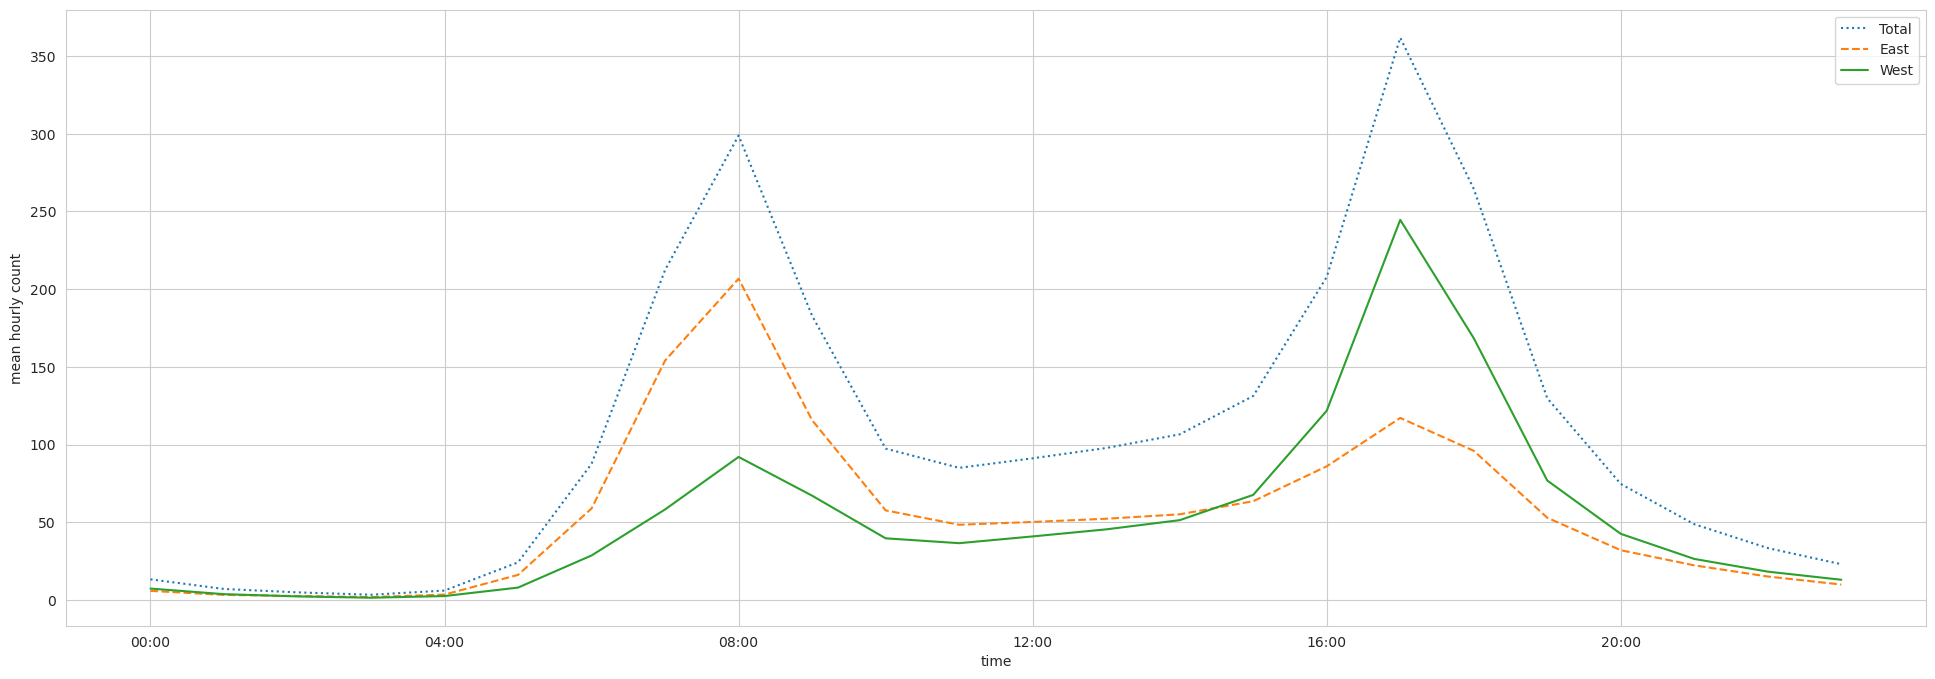

In [73]:
hourly_ticks = 60 * 60 * 4 * np.arange(6)  # sec * min * every4hours
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=(24,8));
plt.ylabel('mean hourly count');

### Can also look at average by day of week

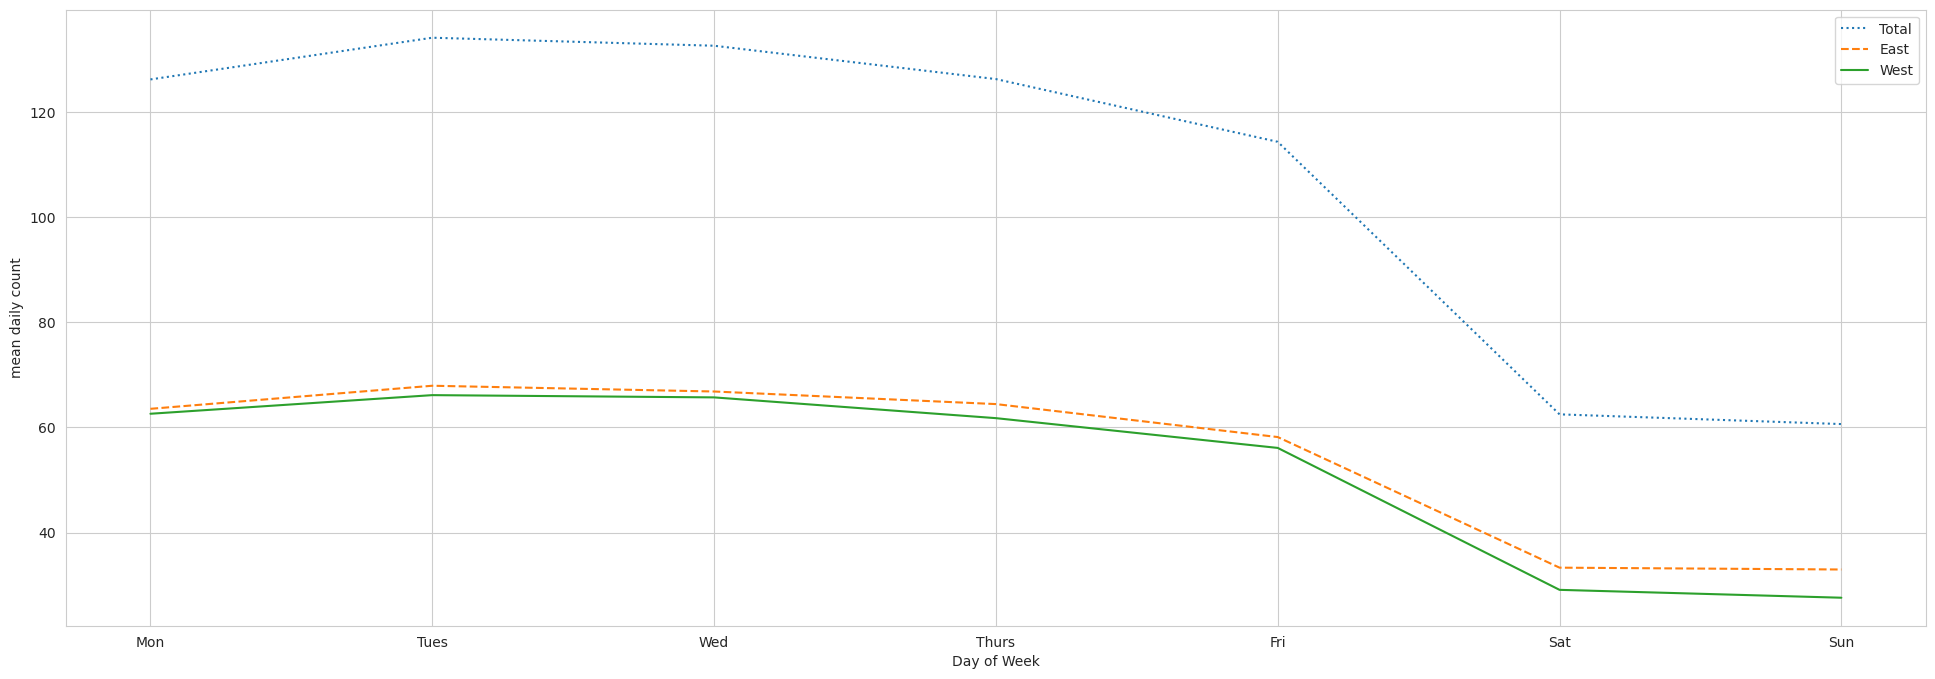

In [74]:
# note that for dayofweek: 0 == Mon, 1 == Tues,..., 6 == 'Sun'
by_weekday = df_bike_counts.groupby(df_bike_counts.index.dayofweek).mean()
by_weekday = by_weekday.set_index(pd.Index(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']))

fig,ax = plt.subplots(1,1,figsize=(24,8))
by_weekday.plot(style=[':', '--', '-'], ax=ax);
ax.set_xlabel('Day of Week');ax.set_ylabel('mean daily count');

### Separate out weekdays and weekends

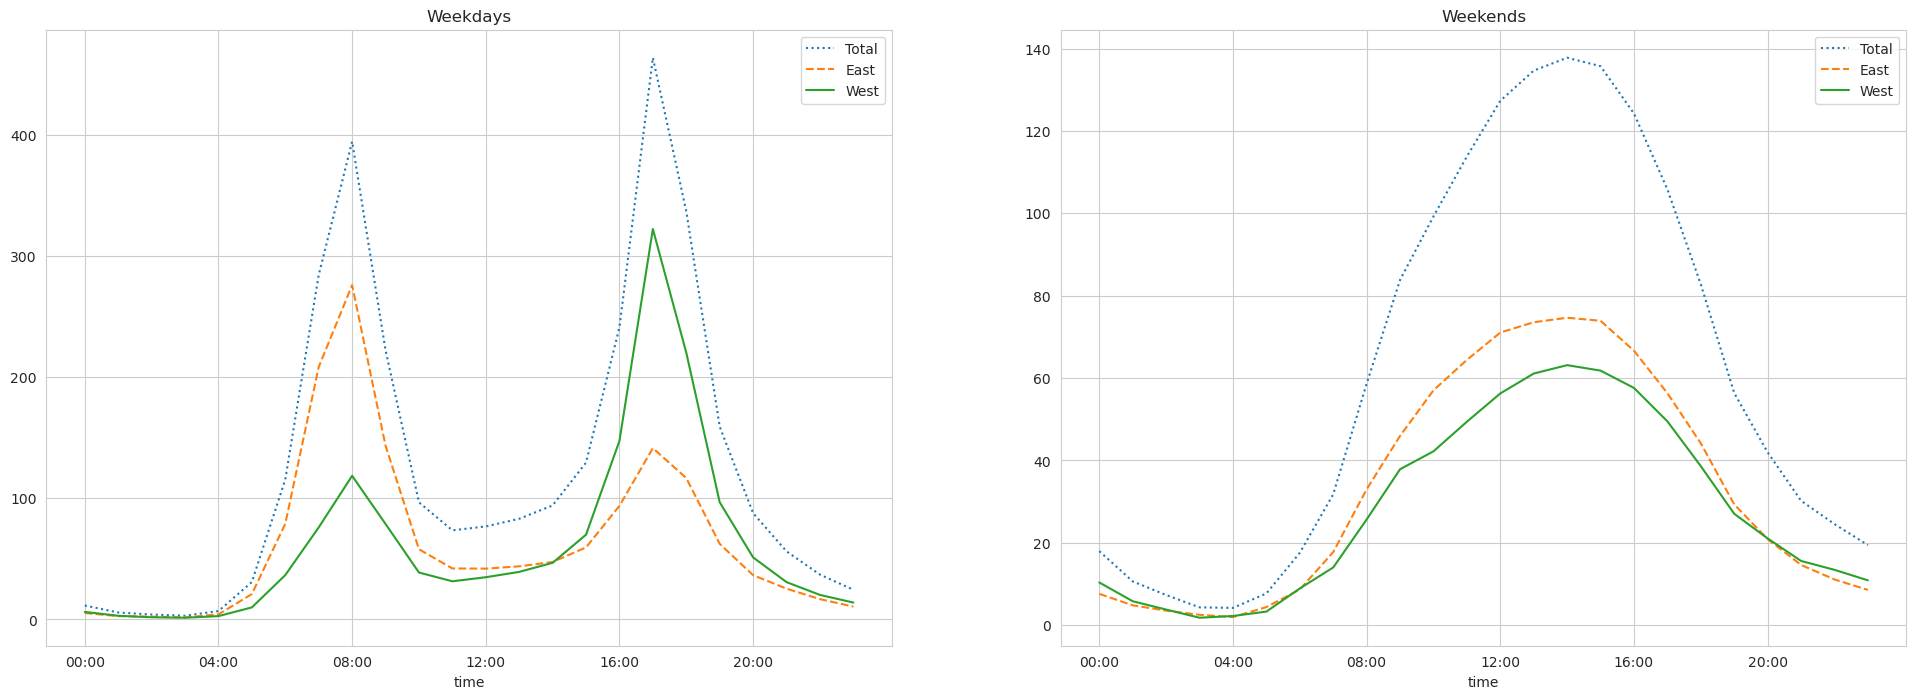

In [75]:
# create a weekend mask
weekend = np.where(df_bike_counts.index.weekday < 5, 'Weekday', 'Weekend')

# get hourly mean values split by weekday, weekend
by_time = df_bike_counts.groupby([weekend, df_bike_counts.index.time]).mean()
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

## Can we predict daily Total bike traffic?

In [76]:
df_bike_counts = pd.read_csv('../data/FremontBridge_2012-2015.csv', index_col='Date', parse_dates=True)
df_bike_weather = pd.read_csv('../data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

df_bike = (
    df_bike_counts.loc[:,['Fremont Bridge Total']]   # keep Total as target
    .rename({'Fremont Bridge Total':'Total'},axis=1) # rename target column
    .resample('D').sum()                             # downsample to daily totals
)
print(df_bike.head(3))

             Total
Date              
2012-10-03  3521.0
2012-10-04  3475.0
2012-10-05  3148.0


### On to Feature Engineering...

### Add 'day of week'

In [77]:
day_names_map = dict(enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))
print(f"{day_names_map = :}")
df_bike['DayOfWeek'] = df_bike.index.dayofweek.map(day_names_map)
df_bike.head(3)

day_names_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


,Total,DayOfWeek
Date,,
2012-10-03,3521.0,Wed
2012-10-04,3475.0,Thu
2012-10-05,3148.0,Fri


### Add 'is it a holiday' dummy feature

In [78]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')

df_bike = df_bike.join(pd.Series(1, index=holidays, name='IsHoliday'))
df_bike['IsHoliday'].fillna(0, inplace=True)
print(df_bike.head(3))

             Total DayOfWeek  IsHoliday
Date                                   
2012-10-03  3521.0       Wed        0.0
2012-10-04  3475.0       Thu        0.0
2012-10-05  3148.0       Fri        0.0


### Add number of hours of daylight

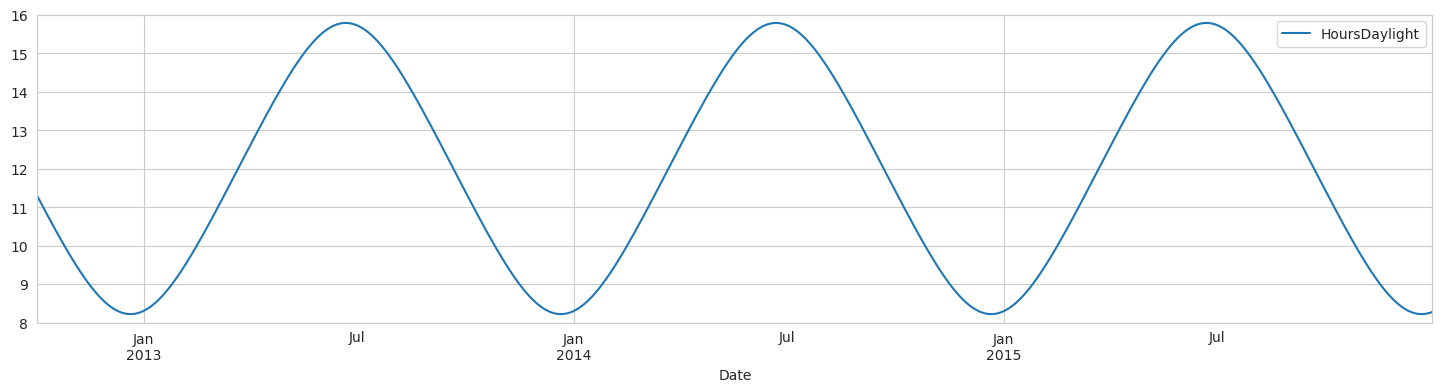

In [79]:
from datetime import datetime

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - datetime(2000, 12, 21)).days # days till winter solstice
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

df_bike['HoursDaylight'] = list(map(hours_of_daylight, df_bike.index));

ax = df_bike[['HoursDaylight']].plot(figsize=(18,4));
ax.set_ylim(8, 16);

### Add weather information (Q: can we predict this for future dates?)

In [80]:
# temperatures are in 1/10 deg C; convert to C
df_bike_weather['TMIN'] /= 10
df_bike_weather['TMAX'] /= 10
df_bike_weather['TempC'] = 0.5 * (df_bike_weather['TMIN'] + df_bike_weather['TMAX'])

# precip is in 1/10 mm; convert to inches
df_bike_weather['PRCP'] /= 254
df_bike_weather['IsDryDay'] = (df_bike_weather['PRCP'] == 0).astype(int)

df_bike = df_bike.join(df_bike_weather[['PRCP', 'TempC', 'IsDryDay']],how='inner')
df_bike.head(3).round(2)

,Total,DayOfWeek,IsHoliday,HoursDaylight,PRCP,TempC,IsDryDay
2012-10-03,3521.0,Wed,0.0,11.28,0.0,13.35,1
2012-10-04,3475.0,Thu,0.0,11.22,0.0,13.60,1
2012-10-05,3148.0,Fri,0.0,11.16,0.0,15.30,1


### Add time of year

In [81]:
df_bike['TimeOfYear'] = (df_bike.index - df_bike.index[0]).days / 365.0 # Days since the beginning of the year
df_bike.head(3)

,Total,DayOfWeek,IsHoliday,HoursDaylight,PRCP,TempC,IsDryDay,TimeOfYear
2012-10-03,3521.0,Wed,0.0,11.277359,0.0,13.35,1,0.000000
2012-10-04,3475.0,Thu,0.0,11.219142,0.0,13.60,1,0.002740
2012-10-05,3148.0,Fri,0.0,11.161038,0.0,15.30,1,0.005479


## Generate and evaluate a model

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

# drop any rows with missing data
df_bike.dropna(axis=0, how='any', inplace=True)

X_bike = pd.get_dummies(df_bike.loc[:,df_bike.columns != 'Total'])
display(X_bike.head(1).round(2))
y_bike = df_bike.Total

X_bike_train = X_bike.loc['2012':'2014']
y_bike_train = y_bike.loc['2012':'2014']
X_bike_test = X_bike.loc['2015']
y_bike_test = y_bike.loc['2015']

dummy_bike = DummyRegressor().fit(X_bike_train,y_bike_train)
gb_bike = GradientBoostingRegressor().fit(X_bike_train,y_bike_train)
print(f'dummy training mae    : {mean_absolute_error(y_bike_train,dummy_bike.predict(X_bike_train)).round(2)}')
print(f'one-back training mae : {mean_absolute_error(y_bike_train,y_bike_train.shift(1).fillna(0)).round(2)}')
print(f'gb training set mae   : {mean_absolute_error(y_bike_train,gb_bike.predict(X_bike_train)).round(2)}')
print(f'gb test set R^2       : {mean_absolute_error(y_bike_test,gb_bike.predict(X_bike_test)).round(2)}')

,IsHoliday,HoursDaylight,PRCP,TempC,IsDryDay,TimeOfYear,DayOfWeek_Fri,DayOfWeek_Mon,DayOfWeek_Sat,DayOfWeek_Sun,DayOfWeek_Thu,DayOfWeek_Tue,DayOfWeek_Wed
2012-10-03,0.0,11.28,0.0,13.35,1,0.0,0,0,0,0,0,0,1


dummy training mae    : 1019.45
one-back training mae : 710.39
gb training set mae   : 213.37
gb test set R^2       : 308.24


## Plot predictions vs observed

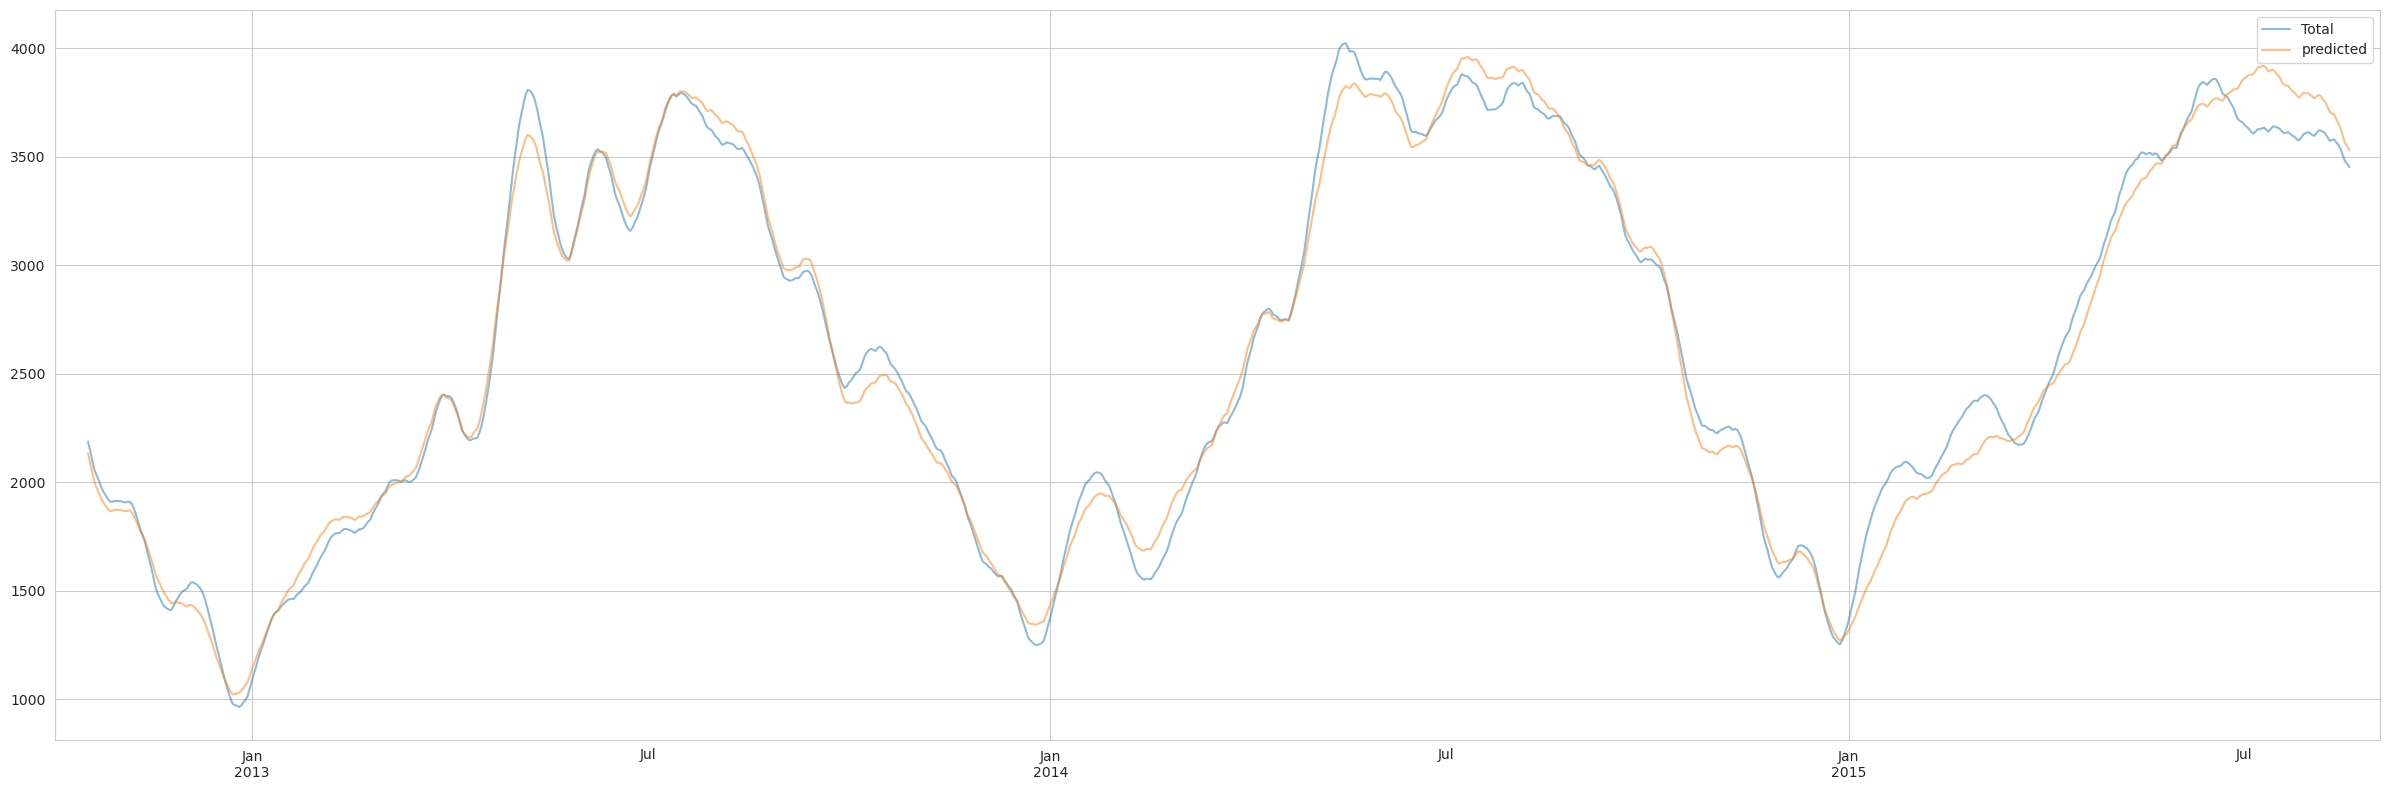

In [83]:
df_bike['predicted'] = gb_bike.predict(X_bike)
df_bike[['Total', 'predicted']].rolling(30, center=True,win_type='gaussian').mean(std=7).plot(alpha=0.5,figsize=(24,8))
plt.tight_layout()

# Time Series Operations Review

- Shifting
- Resampling 
  - Downsampling
  - Upsampling
- Moving/Rolling Windows


- for more info, including time-series cross-validation:
 - [sklearn: Time-related feature engineering](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html?highlight=timeseries#data-exploration-on-the-bike-sharing-demand-dataset)
 - PML Chapter 13 - Modeling Sequential Data Using Recurrent Neural Network (with Tensorflow)

 
 
 - for more models:
  - [skforecast](https://github.com/JoaquinAmatRodrigo/skforecast/)
  - [statsmodels](https://www.statsmodels.org/dev/tsa.html)

<br>
<br>

# <center>Questions re Time Series Transformations?</center>
<br>
<br>

# Delivering Data With Flask

- Flask : lightweight web server
- can be used to create a small API to:

  - return transformed data
  - return predictions
  - return datasets
  - ...


# Aside: Python script basics

In [84]:
!cat ../src/sample_script.py

# import necessary libraries and function
from datetime import datetime

# python as usual
def current_time():
    return datetime.now()

# will run as script or on import
run_or_imported_at = current_time()
print(f"this was run or imported at {run_or_imported_at}")
print(f"{__name__ = :s}")

if __name__ == "__main__":
    # will only run if this is a script
    # won't be run if imported
    print("running as a script")


In [85]:
import sys
sys.path.append('../src/') # need to tell python where to look for this file

import sample_script

this was run or imported at 2022-11-30 18:04:12.290787
__name__ = sample_script


In [86]:
%run ../src/sample_script.py

this was run or imported at 2022-11-30 18:04:12.299807
__name__ = __main__
running as a script


<Figure size 640x480 with 0 Axes>

# Aside: Function Decorators
    
- act like wrappers around functions
- decorators are prefixed by the "@" symbol
- placed above the function to be wrapped

In [87]:
def my_decorator(func):
    def wrapper():
        print("Happens before the function is called.")
        func()
        print("Happens after the function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello")
    
say_hello()

Happens before the function is called.
Hello
Happens after the function is called.


### Creating APIs: Flask

In [88]:
!cat ../src/hello_flask.py

from flask import Flask, escape, request

app = Flask(__name__)

@app.route('/')
def hello():
    name = request.args.get("name", "World")
    return f'Hello, {escape(name)}!\n'

if __name__ == '__main__':
    app.run()


1. at command line, run: `$ python hello_flask.py`
2. in another terminal, ipython (or notebook), run:

# Creating APIs: Flask with Multiple Routes

In [89]:
!cat ../src/die_flask.py

import numpy as np
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route("/")
def help():
    return "Give the number of sides the die should have.\n"

@app.route("/<int:sides>")
def roll_die(sides):
    return str(np.random.randint(1,sides+1))

@app.route("/json/<int:sides>")
def roll_die_json(sides):
    return jsonify({'sides': sides,'roll': np.random.randint(1,sides+1)})

if __name__ == '__main__':
    app.run()


# GET vs POST

- **GET** : pass information in the url

```
127.0.0.1:5000/?firstname=Bryan&lastname=Gibson
```

- **POST** : pass information as additional http request (often JSON)

```
127.0.0.1:5000/
{'firstname':'Bryan','lastname':'Gibson'}
```

### Example Model: Titanic

In [90]:
from sklearn.model_selection import train_test_split
titanic_url = ('https://raw.githubusercontent.com/amueller/scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
df_titanic = pd.read_csv(titanic_url)[['age','fare','embarked','sex','pclass','survived']]
print(df_titanic.info())
X_titanic = df_titanic.drop('survived', axis=1)
y_titanic = df_titanic['survived']
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, y_titanic, 
                                                                                    test_size=0.2, 
                                                                                    stratify=y_titanic,
                                                                                    random_state=42)
display(X_titanic_train.head(3))
print(f"y_train prop positive: {y_titanic_train.mean().round(2)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1046 non-null   float64
 1   fare      1308 non-null   float64
 2   embarked  1307 non-null   object 
 3   sex       1309 non-null   object 
 4   pclass    1309 non-null   int64  
 5   survived  1309 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 61.5+ KB
None


,age,fare,embarked,sex,pclass
999,NaN,7.7500,Q,female,3
392,24.0,27.7208,C,female,2
628,11.0,31.2750,S,female,3


y_train prop positive: 0.38


### Example Model: Titanic

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(solver='lbfgs', random_state=42))])

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}
gs_pipeline = GridSearchCV(pipe, param_grid, cv=3)
gs_pipeline.fit(X_titanic_train, y_titanic_train)
print("best test set score from grid search: {:.3f}".format(gs_pipeline.score(X_titanic_test, y_titanic_test)))
print("best parameter settings: {}".format(gs_pipeline.best_params_))

best test set score from grid search: 0.802
best parameter settings: {'classifier__C': 1.0, 'preprocessor__num__imputer__strategy': 'median'}


# Creating APIs: Flask

- Export trained models (and other data structures) using `pickle`

In [92]:
import pickle as pkl

# write/dump to disk
with open('../data/titanic_pipeline_clf.pkl','wb') as f:
    pkl.dump(gs_pipeline,f)

In [93]:
# read/load from disk
with open('../data/titanic_pipeline_clf.pkl','rb') as f:
    pretrained_titanic_clf = pkl.load(f)
    
pretrained_titanic_clf

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['embarked',
                                                                          'sex',
                                                                          'pclass'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

# Creating APIs: Deliver Predictions Using Flask

In [94]:
!cat ../src/titanic_clf.py

from flask import Flask, escape, request, jsonify
import pickle as pkl
import pandas as pd

# need to train and pickle classifier first
with open('../data/titanic_pipeline_clf.pkl','rb') as f:
    clf = pkl.load(f)

app = Flask(__name__)

@app.route('/',methods=['POST'])
def predict():
    prediction = None
    query = pd.DataFrame(request.form,index=[0])
    print(query,flush=True)
    if query is not None:
        prediction = clf.predict(query)
    if prediction:
        return jsonify([str(x) for x in prediction])
    else:
        return 'no predictions made'

if __name__ == '__main__':
    app.run()


# Creating APIs: Deliver Predictions Using Flask Cont.

In [95]:
query_label = df_titanic.iloc[0].loc['survived']

In [96]:
query = df_titanic.iloc[0,:-1].to_dict()
query

{'age': 29.0, 'fare': 211.3375, 'embarked': 'S', 'sex': 'female', 'pclass': 1}

In [97]:
query_label

1

In [98]:
# Start script from command line by first activating the eods-f22 environment and running: python titanic_clf.py
# Then uncomment the following: 

#import requests
#print(requests.post('http://127.0.0.1:5000/', data=query).text)

<br>
<br>

# <center>Questions re Model API via Flask?</center>
<br>
<br>